In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))


# Any results you write to the current directory are saved as output.

['sample_submission_ns2btKE.csv', 'train', 'test_ApKoW4T.csv']


In [2]:
train = pd.read_csv('../input/train/train.csv')
train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [3]:
from fastai import *

In [4]:
from fastai.vision import *
from fastai.basics import *

In [5]:
ls '../input/'

sample_submission_ns2btKE.csv  test_ApKoW4T.csv  train/


In [6]:
path= Path('../input/train/')

In [7]:
'../input/train/'

'../input/train/'

In [8]:
tfms=get_transforms()
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, res

In [9]:
data = (ImageList .from_csv(path, folder='images', csv_name='train.csv', cols='image')
       #.use_partial_data(sample_pct = .1, seed= 34)
       .split_by_rand_pct(valid_pct=0.1, seed=34)
       .label_from_df(cols='category')
        .add_test_folder(Path('../input/test_ApKoW4T.csv'))
       .transform(tfms, size = 224)
       .databunch(bs=64)).normalize(imagenet_stats)

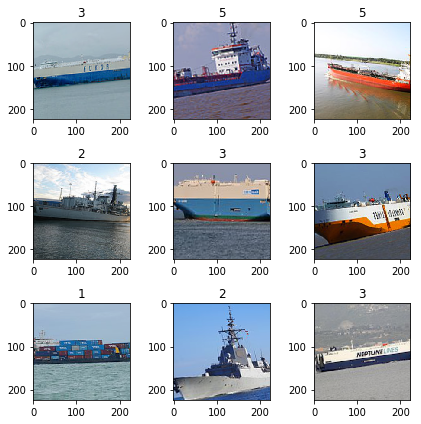

In [10]:
data.show_batch(3, figsize=(6,6), hide_axis=False)

In [12]:
import os
model_dir="/tmp/model/"
if not os.path.exists ("/tmp/model/"):
    !mkdir "/tmp/model/"
learn = cnn_learner(data, models.resnet50,model_dir="/tmp/model/",metrics=[FBeta(beta=1),accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 72719567.28it/s]


In [13]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,f_beta,accuracy,time
0,0.787899,0.435364,0.833880,0.824000,01:18
1,0.528028,0.326135,0.875091,0.864000,01:09
2,0.381476,0.264982,0.901073,0.894400,01:09
3,0.331093,0.242853,0.913415,0.905600,01:08
4,0.276234,0.245893,0.909788,0.900800,01:08


/opt/conda/lib/python3.6/site-packages/fastai/metrics.py:179: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [14]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

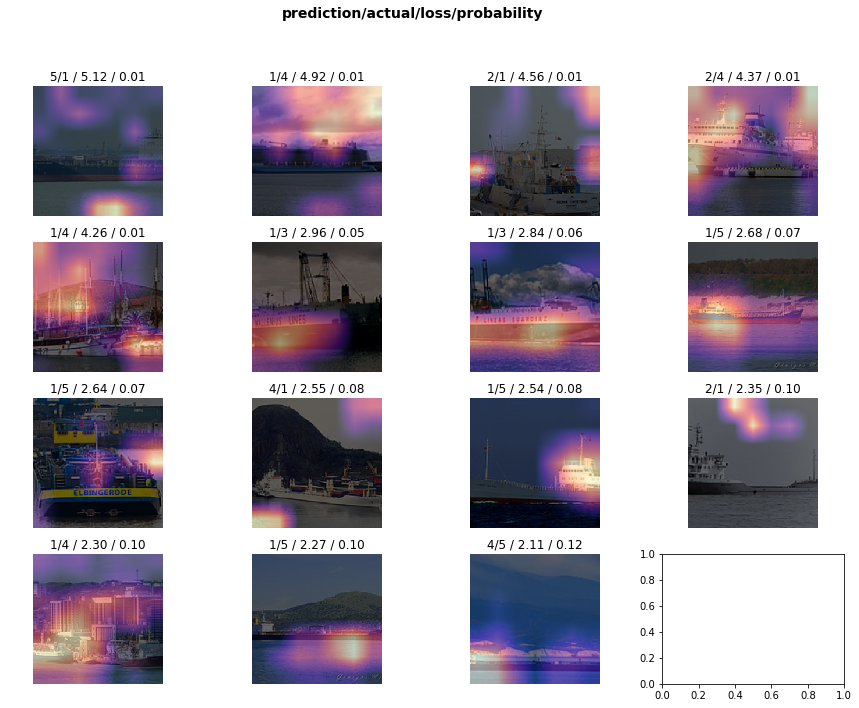

In [15]:
interp.plot_top_losses(15, figsize=(15,11))

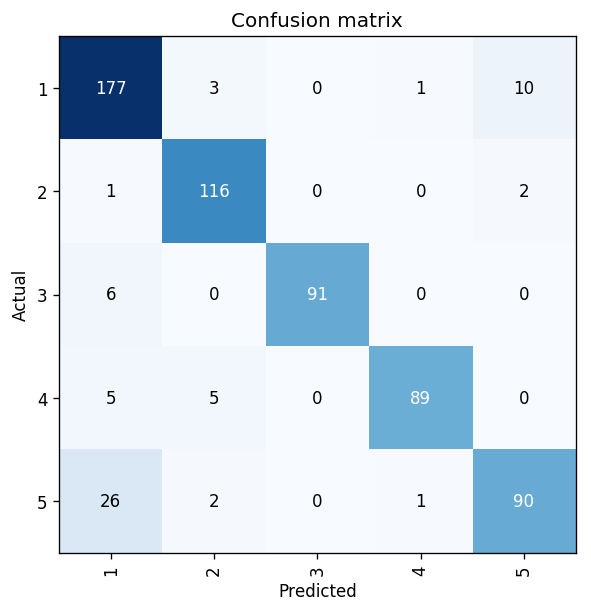

In [16]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=120)

In [17]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


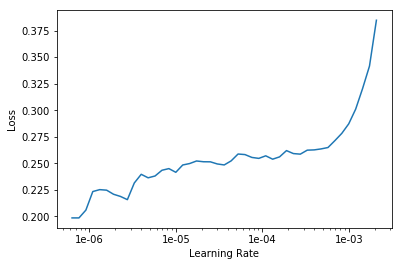

In [18]:
learn.lr_find()
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(8, max_lr=slice(5e-7,1e-7))  ### more,less

epoch,train_loss,valid_loss,f_beta,accuracy,time
0,0.262366,0.242546,0.915356,0.908800,01:12
1,0.264439,0.244132,0.904651,0.896000,01:12
2,0.254867,0.240951,0.919095,0.910400,01:11
3,0.254534,0.234393,0.919819,0.912000,01:11
4,0.239706,0.239564,0.910358,0.902400,01:11
5,0.254494,0.233481,0.916955,0.908800,01:10
6,0.247708,0.233742,0.924548,0.916800,01:10
7,0.257708,0.234874,0.917478,0.908800,01:09


/opt/conda/lib/python3.6/site-packages/fastai/metrics.py:179: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


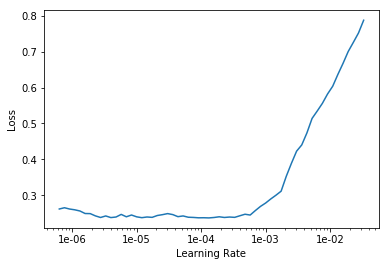

In [20]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [21]:
lr = 1e-4
lrs=np.array([lr/10,lr/3,lr])
learn.unfreeze()
learn.fit(5,lrs)

epoch,train_loss,valid_loss,f_beta,accuracy,time
0,0.232645,0.183869,0.939980,0.936000,01:11
1,0.157613,0.169013,0.948530,0.944000,01:10
2,0.136938,0.166965,0.946895,0.940800,01:10
3,0.097938,0.143403,0.949391,0.945600,01:09
4,0.079655,0.166367,0.946002,0.942400,01:11


/opt/conda/lib/python3.6/site-packages/fastai/metrics.py:179: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


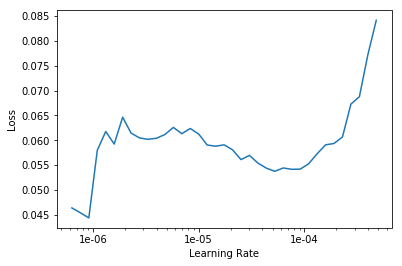

In [22]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-6))  ### more,less

epoch,train_loss,valid_loss,f_beta,accuracy,time
0,0.056527,0.154090,0.954121,0.952000,01:11
1,0.048228,0.154145,0.955675,0.952000,01:11
2,0.051748,0.141699,0.959680,0.956800,01:11
3,0.046839,0.148685,0.956524,0.953600,01:11
4,0.041354,0.145610,0.957861,0.955200,01:11


/opt/conda/lib/python3.6/site-packages/fastai/metrics.py:179: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


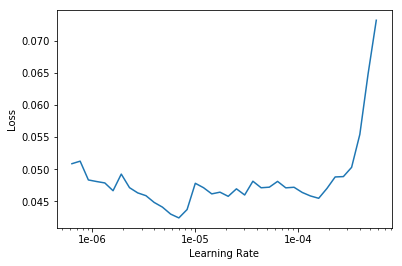

In [24]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [25]:
lr = 0.25e-4
lrs=np.array([lr/10,lr/3,lr])
learn.unfreeze()
learn.fit(5,lrs)

epoch,train_loss,valid_loss,f_beta,accuracy,time
0,0.047458,0.144409,0.956053,0.953600,01:11
1,0.045178,0.140408,0.959457,0.956800,01:11
2,0.035831,0.134310,0.955417,0.952000,01:11
3,0.033634,0.138829,0.961376,0.958400,01:11
4,0.028470,0.142049,0.958598,0.955200,01:11


/opt/conda/lib/python3.6/site-packages/fastai/metrics.py:179: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [26]:
train.shape

(6252, 2)

In [27]:
t  = pd.read_csv('../input/test_ApKoW4T.csv')
t.shape[0]

2680

In [28]:
data.add_test(items=[path/'images'/i for i in t['image'].tolist()],label=None)

In [ ]:
#data.test_dl

In [29]:
preds, y = learn.TTA(beta=0.4,ds_type=DatasetType.Test)

In [30]:
preds.shape

torch.Size([2680, 5])

In [31]:
imgName = t['image'].tolist()
imgName

['1007700.jpg',
 '1011369.jpg',
 '1051155.jpg',
 '1062001.jpg',
 '1069397.jpg',
 '1072861.jpg',
 '1097264.jpg',
 '1098763.jpg',
 '1098766.jpg',
 '1101145.jpg',
 '1114371.jpg',
 '1114781.jpg',
 '1115492.jpg',
 '1121306.jpg',
 '1123736.jpg',
 '1124946.jpg',
 '1125700.jpg',
 '1127236.jpg',
 '1127336.jpg',
 '1130300.jpg',
 '1131990.jpg',
 '1141996.jpg',
 '1145082.jpg',
 '1153400.jpg',
 '1162763.jpg',
 '1162764.jpg',
 '1162765.jpg',
 '1163874.jpg',
 '1174623.jpg',
 '1185778.jpg',
 '1186207.jpg',
 '1193420.jpg',
 '1203926.jpg',
 '1228622.jpg',
 '1229806.jpg',
 '1243717.jpg',
 '1244690.jpg',
 '1244768.jpg',
 '1250078.jpg',
 '1250085.jpg',
 '1252407.jpg',
 '1260394.jpg',
 '1263061.jpg',
 '1263459.jpg',
 '1289223.jpg',
 '1289225.jpg',
 '1296498.jpg',
 '1311396.jpg',
 '1314965.jpg',
 '1324036.jpg',
 '1334848.jpg',
 '1334855.jpg',
 '1342277.jpg',
 '1345016.jpg',
 '1352852.jpg',
 '1359851.jpg',
 '1368439.jpg',
 '1382476.jpg',
 '1386041.jpg',
 '1396598.jpg',
 '1400085.jpg',
 '1400092.jpg',
 '141293

In [32]:
preds_  = torch.argmax(preds,1)+1
preds_

tensor([4, 4, 4,  ..., 4, 4, 4])

In [33]:
preds_ = preds_.numpy()
preds_

array([4, 4, 4, 2, ..., 4, 4, 4, 4])

In [34]:
pd.Series(preds_).value_counts()

1    916
5    513
2    507
3    391
4    353
dtype: int64

In [35]:
predsDF = pd.DataFrame()
predsDF['image'] = imgName
predsDF['category'] = preds_
predsDF.head(20)

,image,category
0,1007700.jpg,4
1,1011369.jpg,4
2,1051155.jpg,4
3,1062001.jpg,2
4,1069397.jpg,4
5,1072861.jpg,4
6,1097264.jpg,4
7,1098763.jpg,2
8,1098766.jpg,2
9,1101145.jpg,4


In [36]:
t.head(20)

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg
5,1072861.jpg
6,1097264.jpg
7,1098763.jpg
8,1098766.jpg
9,1101145.jpg


In [37]:
sum(predsDF['image'] == t['image']) == t.shape[0]

True

In [38]:
predsDF.to_csv('preds_resnet50.csv',index=False)
from IPython.display import FileLink, FileLinks
FileLink('preds_resnet50.csv')

/kaggle/working/preds_resnet50.csv